# **Projeto Final: Introdução à Ciência de Dados**

### Alunos:  
- Davi Henrique Menezes da Cruz  
- Sabrina de Oliveira Souza

### Subproblema:
Diferenças regionais e Perfil Demográfico

### Objetivo:
Analisar a distribuição e a prevalência de casos de SRAG considerando as variáveis de Sexo e Raça/Cor em diferentes UFs do Brasil, no período de 2013 a 2018.

### Variáveis:
- Município de Registro do caso
- Data dos primeiros sintomas 
- Sexo
- Raça/Cor
- UF
- Município de residência 
- Distrito


In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [215]:
df1 = pd.read_csv("./INFLUD16.csv", sep=';', on_bad_lines="skip", encoding="latin1", low_memory=False)
df2 = pd.read_csv("./INFLUD17.csv", sep=';', on_bad_lines="skip", encoding="latin1", low_memory=False)
df3 = pd.read_csv("./INFLUD18.csv", sep=';', on_bad_lines="skip", encoding="latin1", low_memory=False)


#### Parte 1

In [216]:
variaveis = {
    "municipio_registro": ["ID_MUNICIP"],
    "data_primeiros_sintomas": ["DT_SIN_PRI"],
    "sexo": ["CS_SEXO"],
    "raca_cor": ["CS_RACA"],
    "uf": ["SG_UF"],
    "municipio_residencia": ["ID_MN_RESI"],
    "distrito": ["ID_DISTRIT"],
    "idade": ["NU_IDADE_N"],
    "escolaridade": ["CS_ESCOL_N"],
    "gestante": ["CS_GESTANT"],
    "hospital": ["HOSPITAL"],
    "uti": ["UTI"],
    "vacina": ["VACINA"],
    "evolucao": ["EVOLUCAO"],
    "obesidade": ["OBESIDADE"],
    "cardiopati": ["CARDIOPATI"],
    "pneumopati": ["PNEUMOPATI"],
    "metabolica": ["METABOLICA"],
    "febre": ["FEBRE"],
    "tosse": ["TOSSE"],
    "dispneia": ["DISPNEIA"],
}

def selecionar_colunas(df, mapa):
    cols = {}
    for nome_logico, opcoes in mapa.items():
        for coluna in opcoes:
            if coluna in df.columns:
                cols[nome_logico] = df[coluna]
                break
    return pd.DataFrame(cols)

df1_sel = selecionar_colunas(df1, variaveis)
df2_sel = selecionar_colunas(df2, variaveis)
df3_sel = selecionar_colunas(df3, variaveis)

def analisar_na(df, nome):
    print(f"\nValores ausentes: {nome}")
    print((df.isna().mean() * 100).round(2))

def analisar_tipos(df, nome):
    print(f"\nTipos de dados: {nome}")
    print(df.dtypes)

def mostrar_valores_unicos(df, coluna, nome_df):
    print(f"\nValores únicos da coluna '{coluna}' em {nome_df}")
    print(df[coluna].value_counts(dropna=False))

def checar_uf(df, nome_df):
    ufs_validas = {
        "AC","AL","AP","AM","BA","CE","DF","ES","GO","MA","MT","MS","MG",
        "PA","PB","PR","PE","PI","RJ","RN","RS","RO","RR","SC","SP","SE","TO"
    }
    if "uf" in df.columns:
        invalidas = df.loc[~df["uf"].isin(ufs_validas), "uf"].unique()
        print(f"\n--- UF inválidas em {nome_df}: {invalidas if len(invalidas) > 0 else 'Nenhuma'}")
    else:
        print(f"\n--- Coluna 'uf' não encontrada em {nome_df}")

analisar_na(df1_sel, "Base 2016")
analisar_na(df2_sel, "Base 2017")
analisar_na(df3_sel, "Base 2018")

analisar_tipos(df1_sel, "Base 2016")
analisar_tipos(df2_sel, "Base 2017")
analisar_tipos(df3_sel, "Base 2018")

mostrar_valores_unicos(df1_sel, "sexo", "Base 2016")
mostrar_valores_unicos(df2_sel, "sexo", "Base 2017")
mostrar_valores_unicos(df3_sel, "sexo", "Base 2018")

mostrar_valores_unicos(df1_sel, "raca_cor", "Base 2016")

checar_uf(df1_sel, "Base 2016")
checar_uf(df2_sel, "Base 2017")
checar_uf(df3_sel, "Base 2018")



Valores ausentes: Base 2016
municipio_registro         0.00
data_primeiros_sintomas    0.00
sexo                       0.00
raca_cor                   3.65
uf                         0.00
municipio_residencia       0.00
idade                      0.00
escolaridade               5.74
gestante                   0.01
hospital                   0.05
uti                        2.50
vacina                     2.00
evolucao                   4.52
obesidade                  4.54
cardiopati                 3.38
pneumopati                 3.34
metabolica                 3.71
febre                      0.64
tosse                      0.53
dispneia                   1.09
dtype: float64

Valores ausentes: Base 2017
municipio_registro         0.00
data_primeiros_sintomas    0.00
sexo                       0.00
raca_cor                   2.65
uf                         0.00
municipio_residencia       0.00
idade                      0.00
escolaridade               3.52
gestante                   0.00

#### Parte 2

        ANÁLISE: 2016        
-------------------------------

   - Nulos tratados. Tamanho final do DF: 54380 linhas.

   - Contagem e porcentagem da coluna 'sexo':
          Contagem  Porcentagem
sexo                           
F            27649        50.84
M            26717        49.13
IGNORADO        14         0.03

   - Contagem e porcentagem da coluna 'raca_cor':
          Contagem  Porcentagem
raca_cor                       
1.0          30578        56.23
4.0          11374        20.92
9.0           7518        13.82
2.0           2181         4.01
IGNORADO      1985         3.65

   - Contagem e porcentagem da coluna 'uf':
    Contagem  Porcentagem
uf                       
35     20939        38.50
41      6603        12.14
43      5631        10.35
31      4974         9.15
42      2792         5.13


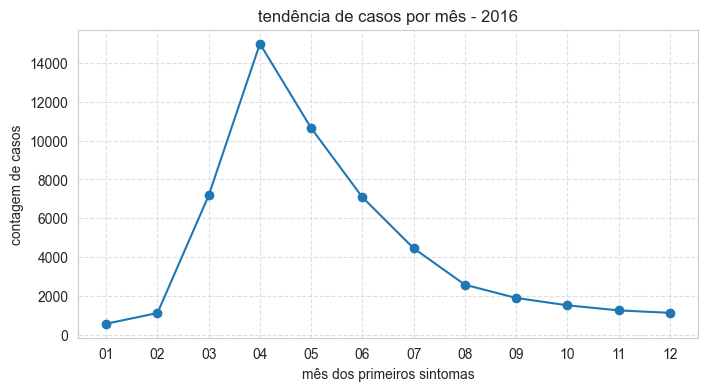

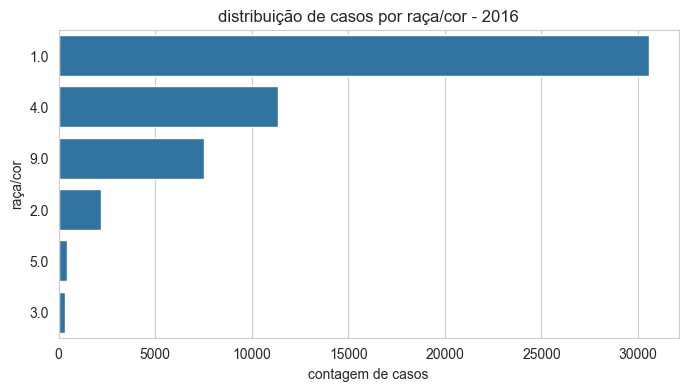

        ANÁLISE: 2017        
-------------------------------

   - Nulos tratados. Tamanho final do DF: 29551 linhas.

   - Contagem e porcentagem da coluna 'sexo':
          Contagem  Porcentagem
sexo                           
M            15061        50.97
F            14482        49.01
IGNORADO         8         0.03

   - Contagem e porcentagem da coluna 'raca_cor':
          Contagem  Porcentagem
raca_cor                       
1.0          15444        52.26
4.0           7882        26.67
9.0           3911        13.23
2.0           1133         3.83
IGNORADO       782         2.65

   - Contagem e porcentagem da coluna 'uf':
    Contagem  Porcentagem
uf                       
35      8295        28.07
41      4428        14.98
43      3185        10.78
31      3098        10.48
26      1833         6.20


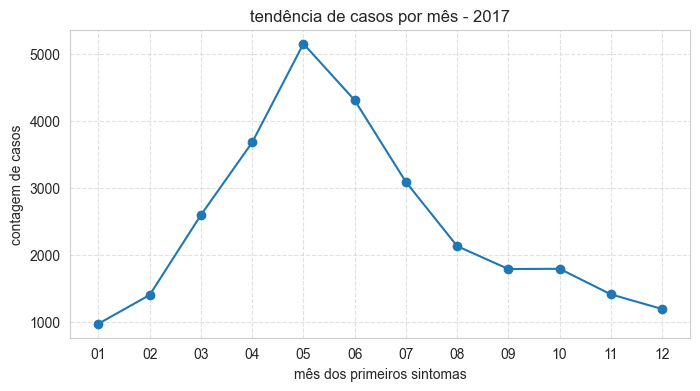

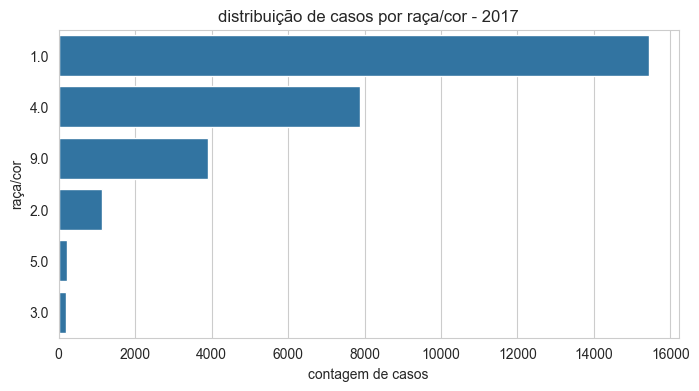

        ANÁLISE: 2018        
-------------------------------

   - Nulos tratados. Tamanho final do DF: 47756 linhas.

   - Contagem e porcentagem da coluna 'sexo':
          Contagem  Porcentagem
sexo                           
M            24397        51.09
F            23351        48.90
IGNORADO         8         0.02

   - Contagem e porcentagem da coluna 'raca_cor':
          Contagem  Porcentagem
raca_cor                       
1.0          24003        50.26
4.0          14258        29.86
9.0           5767        12.08
2.0           1851         3.88
IGNORADO      1310         2.74

   - Contagem e porcentagem da coluna 'uf':
    Contagem  Porcentagem
uf                       
35     14880        31.16
41      6754        14.14
43      3734         7.82
31      3123         6.54
42      2303         4.82


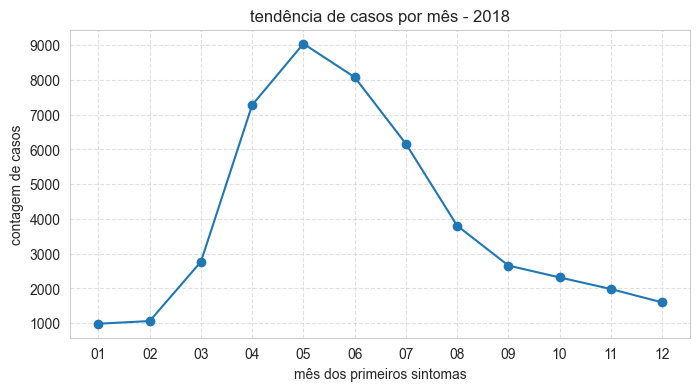

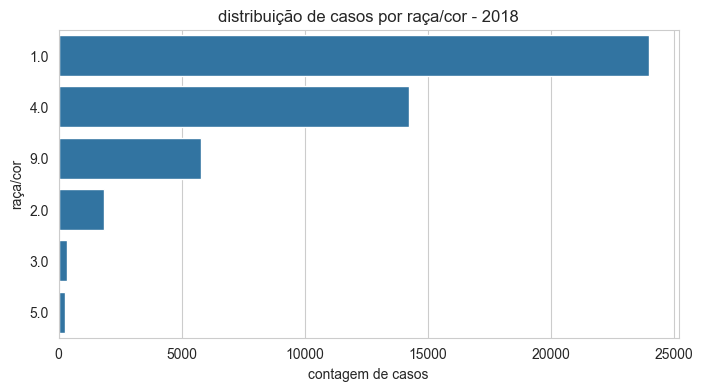

In [217]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 4)

def analise_completa_srag(df, ano_label):
    print(f"        ANÁLISE: {ano_label}        ")
    print(f"-------------------------------\n")
    
    df_analise = df.copy()
    
    if 'data_primeiros_sintomas' in df_analise.columns:
        df_analise['data_primeiros_sintomas'] = pd.to_datetime(
            df_analise['data_primeiros_sintomas'], 
            format='%d/%m/%Y',
            errors='coerce'
        )
    
    for col in ['sexo', 'raca_cor', 'uf']:
        if col in df_analise.columns:
            df_analise[col] = df_analise[col].astype(str).str.strip().str.upper()
            
            if col == 'sexo':
                df_analise.loc[df_analise['sexo'].isin(['I', 'E', 'NAN']), 'sexo'] = np.nan
            if col == 'raca_cor':
                df_analise.loc[df_analise['raca_cor'].isin(['9', 'NAN']), 'raca_cor'] = np.nan
    
    # Tratamento de variáveis numéricas (idade)
    if 'idade' in df_analise.columns:
        df_analise['idade'] = pd.to_numeric(df_analise['idade'], errors='coerce').astype(float)
        if df_analise['idade'].max() > 150:
            df_analise.loc[df_analise['idade'] > 150, 'idade'] = (df_analise.loc[df_analise['idade'] > 150, 'idade'] / 365.25).astype(float)
        df_analise.loc[(df_analise['idade'] < 0) | (df_analise['idade'] > 120), 'idade'] = np.nan
    
    # Tratamento de variáveis categóricas adicionais
    variaveis_cat_adicionais = [
        'escolaridade', 'gestante', 'hospital', 'uti',
        'vacina', 'evolucao', 'obesidade', 'cardiopati', 
        'pneumopati', 'metabolica', 'febre', 'tosse', 'dispneia'
    ]
    
    for col in variaveis_cat_adicionais:
        if col in df_analise.columns:
            df_analise[col] = pd.to_numeric(df_analise[col], errors='coerce')
            if col in ['gestante', 'hospital', 'uti', 'vacina', 'evolucao',
                        'obesidade', 'cardiopati', 'pneumopati', 'metabolica',
                       'febre', 'tosse', 'dispneia']:
                df_analise.loc[df_analise[col] == 9, col] = np.nan
            if col == 'escolaridade':
                df_analise.loc[df_analise[col] == 9, col] = np.nan
    
    colunas_categoricas = [c for c in ['sexo', 'raca_cor', 'uf'] if c in df_analise.columns]
    for col in colunas_categoricas:
        df_analise[col] = df_analise[col].fillna('IGNORADO')
    
    df_analise.dropna(subset=['data_primeiros_sintomas'], inplace=True)
    print(f"   - Nulos tratados. Tamanho final do DF: {len(df_analise)} linhas.")
    
    if 'data_primeiros_sintomas' in df_analise.columns:
        df_analise['mes'] = df_analise['data_primeiros_sintomas'].dt.month
    
    for col in colunas_categoricas:
        print(f"\n   - Contagem e porcentagem da coluna '{col}':")
        contagem = df_analise[col].value_counts(dropna=False)
        percentual = (df_analise[col].value_counts(normalize=True) * 100).round(2)
        
        estatisticas = pd.DataFrame({'Contagem': contagem, 'Porcentagem': percentual})
        print(estatisticas.head(5))
    
    if 'mes' in df_analise.columns:
        plt.figure(figsize=(8, 4))
        casos_por_mes = df_analise.groupby('mes').size() 
        casos_por_mes.plot(kind='line', marker='o')
        
        plt.title(f'tendência de casos por mês - {ano_label}')
        plt.xlabel('mês dos primeiros sintomas')
        plt.ylabel('contagem de casos')
        plt.xticks(range(1, 13), labels=[f'{m:02d}' for m in range(1, 13)])
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    
    if 'raca_cor' in df_analise.columns:
        plt.figure(figsize=(8, 4))
        data_plot = df_analise[df_analise['raca_cor'] != 'IGNORADO']
        
        sns.countplot(
            y='raca_cor', 
            data=data_plot, 
            order=data_plot['raca_cor'].value_counts().index,
        )
        
        plt.title(f'distribuição de casos por raça/cor - {ano_label}')
        plt.xlabel('contagem de casos')
        plt.ylabel('raça/cor')
        plt.show()
    
    return df_analise

df1_tratado = analise_completa_srag(df1_sel, "2016")
df2_tratado = analise_completa_srag(df2_sel, "2017")
df3_tratado = analise_completa_srag(df3_sel, "2018")


### Parte 3

In [218]:
# MODELAGEM COMPLETA
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df1_model = df1_tratado.copy()
df2_model = df2_tratado.copy()
df3_model = df3_tratado.copy()

df1_model["ano"] = 2016
df2_model["ano"] = 2017
df3_model["ano"] = 2018

df_all = pd.concat([df1_model, df2_model, df3_model], ignore_index=True)
print("Tamanho do conjunto unificado:", df_all.shape)

map_regiao = {
    "RO": "N", "AC": "N", "AM": "N", "RR": "N", "PA": "N", "AP": "N", "TO": "N",
    "MA": "NE", "PI": "NE", "CE": "NE", "RN": "NE", "PB": "NE", "PE": "NE",
    "AL": "NE", "SE": "NE", "BA": "NE",
    "MG": "SE", "ES": "SE", "RJ": "SE", "SP": "SE",
    "PR": "S", "SC": "S", "RS": "S",
    "MS": "CO", "MT": "CO", "GO": "CO", "DF": "CO"
}
df_all["regiao"] = df_all["uf"].map(map_regiao)

if "mes" not in df_all.columns:
    df_all["mes"] = df_all["data_primeiros_sintomas"].dt.month

df_all["raca_cor"] = pd.to_numeric(df_all["raca_cor"], errors="coerce")

if "uti" in df_all.columns:
    df_all["uti"] = pd.to_numeric(df_all["uti"], errors="coerce")
    df_all["internado_uti"] = np.where(
        df_all["uti"] == 1, 1,
        np.where(df_all["uti"] == 2, 0, np.nan)
    )
else:
    print(" Variável UTI não encontrada no dataset!")
    df_all["internado_uti"] = np.nan

df_modelo = df_all[
    df_all["sexo"].isin(["M", "F"])
].dropna(subset=["internado_uti"]).copy()

print("Tamanho do conjunto após filtragem:", df_modelo.shape)
print("\nDistribuição da variável alvo (internado_uti):")
print(df_modelo["internado_uti"].value_counts(normalize=True).round(3))
print("\nContagem absoluta:")
print(df_modelo["internado_uti"].value_counts())

df_modelo[["raca_cor", "internado_uti", "sexo", "uf", "regiao", "ano", "mes", "uti"]].head()

cols_cat = ["sexo", "regiao"]

if "raca_cor" in df_modelo.columns:
    df_modelo["raca_cor_cat"] = df_modelo["raca_cor"].apply(
        lambda x: "Branca" if x == 1.0
        else "Preta" if x == 2.0
        else "Amarela" if x == 3.0
        else "Parda" if x == 4.0
        else "Indígena" if x == 5.0
        else "Ignorado"
    )
    cols_cat.append("raca_cor_cat")

variaveis_cat_potenciais = [
    "escolaridade", "gestante", "hospital",
    "vacina", "evolucao", "obesidade", "cardiopati",
    "pneumopati", "metabolica", "febre", "tosse", "dispneia"
]
for col in variaveis_cat_potenciais:
    if col in df_modelo.columns:
        cols_cat.append(col)

cols_num = ["ano", "mes"]
if "idade" in df_modelo.columns:
    cols_num.append("idade")

cols_cat = [c for c in cols_cat if c in df_modelo.columns]
cols_num = [c for c in cols_num if c in df_modelo.columns]

# Preencher valores ausentes nas categóricas antes de criar dummies
df_modelo_cat = df_modelo[cols_cat].copy()
for col in df_modelo_cat.columns:
    if df_modelo_cat[col].isna().any():
        if df_modelo_cat[col].dtype in ['float64', 'int64']:
            moda = df_modelo_cat[col].mode()
            if len(moda) > 0:
                df_modelo_cat[col] = df_modelo_cat[col].fillna(moda[0])
            else:
                df_modelo_cat[col] = df_modelo_cat[col].fillna(2)
        else:
            moda = df_modelo_cat[col].mode()
            if len(moda) > 0:
                df_modelo_cat[col] = df_modelo_cat[col].fillna(moda[0])

X_cat = pd.get_dummies(df_modelo_cat, drop_first=True)
X_num = df_modelo[cols_num].copy()

# Preencher valores ausentes nas numéricas com a mediana
for col in X_num.columns:
    if X_num[col].isna().any():
        X_num[col] = X_num[col].fillna(X_num[col].median())

X = pd.concat([X_cat, X_num], axis=1)
y = df_modelo["internado_uti"]

# Verificar se há NaN após combinar features
if X.isna().sum().sum() > 0:
    print(" Aviso: Ainda há NaN no conjunto X!")
    print("Colunas com NaN:", X.columns[X.isna().any()].tolist())
    print("Quantidade de NaN por coluna:")
    print(X.isna().sum()[X.isna().sum() > 0])
    for col in X.columns:
        if X[col].isna().any():
            if X[col].dtype in ['float64', 'int64']:
                X[col] = X[col].fillna(X[col].median())
            else:
                X[col] = X[col].fillna(0)
    print(" NaN preenchidos!")
else:
    print(" Nenhum NaN encontrado no conjunto X")

y = df_modelo["internado_uti"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
print("Tamanhos (train/test):", X_train.shape, X_test.shape)

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("\n--- Relatório de classificação (Classe positiva = 1 = internado em UTI) ---\n")
print(classification_report(y_test, y_pred))
print("\n--- Matriz de confusão ---\n")
print(confusion_matrix(y_test, y_pred))


Tamanho do conjunto unificado: (131687, 22)
Tamanho do conjunto após filtragem: (127281, 24)

Distribuição da variável alvo (internado_uti):
internado_uti
0.0    0.646
1.0    0.354
Name: proportion, dtype: float64

Contagem absoluta:
internado_uti
0.0    82258
1.0    45023
Name: count, dtype: int64
 Nenhum NaN encontrado no conjunto X
Tamanhos (train/test): (89096, 21) (38185, 21)

--- Relatório de classificação (Classe positiva = 1 = internado em UTI) ---

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     24678
         1.0       0.52      0.58      0.55     13507

    accuracy                           0.66     38185
   macro avg       0.64      0.64      0.64     38185
weighted avg       0.67      0.66      0.67     38185


--- Matriz de confusão ---

[[17548  7130]
 [ 5727  7780]]


c:\Users\davih\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [219]:
import numpy as np
import pandas as pd

df1_model = df1_tratado.copy()
df2_model = df2_tratado.copy()
df3_model = df3_tratado.copy()

df1_model["ano"] = 2016
df2_model["ano"] = 2017
df3_model["ano"] = 2018

df_all = pd.concat([df1_model, df2_model, df3_model], ignore_index=True)
print("Tamanho do conjunto unificado:", df_all.shape)
df_all.head()


Tamanho do conjunto unificado: (131687, 22)


,municipio_registro,data_primeiros_sintomas,sexo,raca_cor,uf,municipio_residencia,idade,escolaridade,gestante,hospital,...,evolucao,obesidade,cardiopati,pneumopati,metabolica,febre,tosse,dispneia,mes,ano
0,110020,2016-06-25,M,5.0,11,110001,5.549624,10.0,6.0,1.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,6,2016
1,110004,2016-05-13,F,1.0,11,110001,11.110198,2.0,6.0,1.0,...,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,5,2016
2,110004,2016-05-25,M,1.0,11,110001,11.074606,NaN,6.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,5,2016
3,110002,2016-05-01,M,4.0,11,110002,10.962355,10.0,6.0,1.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,5,2016
4,110002,2016-05-04,F,1.0,11,110002,11.110198,1.0,5.0,1.0,...,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,5,2016


In [220]:
if 'idade' in df_all.columns:
    print("Análise da variável idade:")
    print(f"Valores únicos (amostra): {df_all['idade'].unique()[:10]}")
    print(f"Min: {df_all['idade'].min()}, Max: {df_all['idade'].max()}")
    print(f"Valores ausentes: {df_all['idade'].isna().sum()} ({df_all['idade'].isna().mean()*100:.2f}%)")
    
    idade_original = df_all['idade'].copy()
    df_all['idade'] = pd.to_numeric(df_all['idade'], errors='coerce')
    
    if df_all['idade'].max() > 120:
        print(f"\n Valores de idade muito altos detectados. Convertendo...")
        df_all.loc[df_all['idade'] > 120, 'idade'] = df_all.loc[df_all['idade'] > 120, 'idade'] / 365.25
    
    df_all.loc[(df_all['idade'] < 0) | (df_all['idade'] > 120), 'idade'] = np.nan
    
    print(f"\nApós tratamento:")
    print(f"Min: {df_all['idade'].min():.2f}, Max: {df_all['idade'].max():.2f}")
    print(f"Média: {df_all['idade'].mean():.2f}, Mediana: {df_all['idade'].median():.2f}")
    print(f"Valores ausentes: {df_all['idade'].isna().sum()} ({df_all['idade'].isna().mean()*100:.2f}%)")
else:
    print("Variável 'idade' não encontrada no dataset.")


Análise da variável idade:
Valores únicos (amostra): [ 5.54962355 11.11019849 11.07460643 10.96235455 11.09924709 10.9596167
 11.00342231 11.16221766 11.03080082 11.00889802]
Min: 2.7405886379192332, Max: 11.268993839835728
Valores ausentes: 0 (0.00%)

Após tratamento:
Min: 2.74, Max: 11.27
Média: 10.22, Mediana: 10.99
Valores ausentes: 0 (0.00%)


In [221]:
map_regiao = {
    "RO": "N", "AC": "N", "AM": "N", "RR": "N", "PA": "N", "AP": "N", "TO": "N",
    "MA": "NE", "PI": "NE", "CE": "NE", "RN": "NE", "PB": "NE", "PE": "NE",
    "AL": "NE", "SE": "NE", "BA": "NE",
    "MG": "SE", "ES": "SE", "RJ": "SE", "SP": "SE",
    "PR": "S", "SC": "S", "RS": "S",
    "MS": "CO", "MT": "CO", "GO": "CO", "DF": "CO"
}
df_all["regiao"] = df_all["uf"].map(map_regiao)

if "mes" not in df_all.columns:
    df_all["mes"] = df_all["data_primeiros_sintomas"].dt.month

df_all["sexo"] = df_all["sexo"].astype(str).str.strip().str.upper()
df_all["raca_cor"] = pd.to_numeric(df_all["raca_cor"], errors='coerce')

if "uti" in df_all.columns:
    df_all["uti"] = pd.to_numeric(df_all["uti"], errors="coerce")
    df_all["internado_uti"] = np.where(
        df_all["uti"] == 1, 1,
        np.where(df_all["uti"] == 2, 0, np.nan)
    )
else:
    print(" Variável UTI não encontrada no dataset!")
    df_all["internado_uti"] = np.nan

df_modelo = df_all[
    df_all["sexo"].isin(["M", "F"])
].dropna(subset=["internado_uti"]).copy()

print("Tamanho do conjunto após filtragem:", df_modelo.shape)
print("\nDistribuição da variável alvo (internado_uti):")
print(df_modelo["internado_uti"].value_counts(normalize=True).round(3))
print("\nContagem absoluta:")
print(df_modelo["internado_uti"].value_counts())

df_modelo[["raca_cor", "internado_uti", "sexo", "uf", "regiao", "ano", "mes", "uti"]].head()


Tamanho do conjunto após filtragem: (127281, 24)

Distribuição da variável alvo (internado_uti):
internado_uti
0.0    0.646
1.0    0.354
Name: proportion, dtype: float64

Contagem absoluta:
internado_uti
0.0    82258
1.0    45023
Name: count, dtype: int64


,raca_cor,internado_uti,sexo,uf,regiao,ano,mes,uti
1,1.0,0.0,F,11,NaN,2016,5,2.0
2,1.0,1.0,M,11,NaN,2016,5,1.0
3,4.0,0.0,M,11,NaN,2016,5,2.0
4,1.0,1.0,F,11,NaN,2016,5,1.0
5,5.0,0.0,F,11,NaN,2016,3,2.0


### Variável Alvo e Features do Modelo

**VARIÁVEL ALVO:**
- **Internação em UTI (`internado_uti`)**: Variável binária que indica se o paciente foi internado em UTI (1 = Sim, 0 = Não)

**FEATURES (Variáveis Preditoras):**

Foram adicionadas as seguintes variáveis para melhorar a capacidade preditiva do modelo:

**Variáveis Numéricas:**
- **Idade (`NU_IDADE_N`)**: Idade do paciente em anos. Pode estar relacionada com padrões demográficos de raça/cor.

**Variáveis Categóricas - Demográficas:**
- **Raça/Cor (`CS_RACA`)**: Agora incluída como feature. Categorias: Branca, Preta, Amarela, Parda, Indígena.
- **Escolaridade (`CS_ESCOL_N`)**: Nível de escolaridade do paciente. Pode estar relacionada com acesso à saúde.
- **Gestante (`CS_GESTANT`)**: Indica se o paciente é gestante. Pode ser relevante para análise de gravidade.

**Variáveis Categóricas - Acesso à Saúde:**
- **Hospitalizado (`HOSPITAL`)**: Indica se o paciente foi hospitalizado. Pode estar relacionado com necessidade de UTI.
- **Vacinação (`VACINA`)**: Indica se o paciente foi vacinado. Pode refletir acesso a serviços de saúde preventiva.
- **Evolução (`EVOLUCAO`)**: Evolução do caso (cura, óbito, etc.). Pode estar relacionada com gravidade.

**Variáveis Categóricas - Comorbidades:**
- **Obesidade (`OBESIDADE`)**: Indica presença de obesidade. Pode estar relacionada com fatores socioeconômicos.
- **Cardiopatia (`CARDIOPATI`)**: Indica presença de cardiopatia.
- **Pneumopatia (`PNEUMOPATI`)**: Indica presença de pneumopatia.
- **Doença Metabólica (`METABOLICA`)**: Indica presença de doença metabólica.

**Variáveis Categóricas - Sintomas:**
- **Febre (`FEBRE`)**: Presença de febre.
- **Tosse (`TOSSE`)**: Presença de tosse.
- **Dispneia (`DISPNEIA`)**: Presença de dispneia (dificuldade respiratória).

Essas variáveis foram escolhidas por:

1. Terem baixa taxa de valores ausentes (<5% na maioria dos casos)
2. Estarem potencialmente relacionadas com fatores que influenciam a necessidade de internação em UTI
3. Incluírem informações demográficas, de comorbidades e sintomas que podem indicar gravidade
4. Refletirem diferentes dimensões do perfil de saúde do paciente que podem predizer necessidade de cuidados intensivos

**Nota:** A variável UTI foi removida das features pois agora é a variável alvo do modelo.


In [ ]:
from sklearn.model_selection import train_test_split


cols_cat = ["sexo", "regiao"]

if "raca_cor" in df_modelo.columns:
    df_modelo["raca_cor_cat"] = df_modelo["raca_cor"].apply(
        lambda x: "Branca" if x == 1.0
        else "Preta" if x == 2.0
        else "Amarela" if x == 3.0
        else "Parda" if x == 4.0
        else "Indígena" if x == 5.0
        else "Ignorado"
    )
    cols_cat.append("raca_cor_cat")

variaveis_cat_potenciais = [
    "escolaridade", "gestante", "hospital",
    "vacina", "evolucao", "obesidade", "cardiopati",
    "pneumopati", "metabolica", "febre", "tosse", "dispneia"
]
for col in variaveis_cat_potenciais:
    if col in df_modelo.columns:
        cols_cat.append(col)

cols_num = ["ano", "mes"]
if "idade" in df_modelo.columns:
    cols_num.append("idade")

cols_cat = [c for c in cols_cat if c in df_modelo.columns]
cols_num = [c for c in cols_num if c in df_modelo.columns]

# Preencher valores ausentes nas categóricas antes de criar dummies
df_modelo_cat = df_modelo[cols_cat].copy()
for col in df_modelo_cat.columns:
    if df_modelo_cat[col].isna().any():
        if df_modelo_cat[col].dtype in ['float64', 'int64']:
            moda = df_modelo_cat[col].mode()
            if len(moda) > 0:
                df_modelo_cat[col] = df_modelo_cat[col].fillna(moda[0])
            else:
                df_modelo_cat[col] = df_modelo_cat[col].fillna(2)
        else:
            moda = df_modelo_cat[col].mode()
            if len(moda) > 0:
                df_modelo_cat[col] = df_modelo_cat[col].fillna(moda[0])

X_cat = pd.get_dummies(df_modelo_cat, drop_first=True)
X_num = df_modelo[cols_num].copy()

# Preencher valores ausentes nas numéricas com a mediana
for col in X_num.columns:
    if X_num[col].isna().any():
        X_num[col] = X_num[col].fillna(X_num[col].median())

X = pd.concat([X_cat, X_num], axis=1)
y = df_modelo["internado_uti"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
print("Tamanhos (train/test):", X_train.shape, X_test.shape)


A Regressão Logística é adequada para este estudo por lidar com classificação binária (internado em UTI vs. não internado em UTI), permitindo analisar o efeito de sexo, região e outros fatores demográficos na prevalência de SRAG entre diferentes UFs do Brasil.

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Relatório de classificação (classe positiva = internado_uti = 1):")
print(classification_report(y_test, y_pred, zero_division=0))

print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))


c:\Users\davih\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Relatório de classificação (classe positiva = internado_uti = 1):
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     24678
         1.0       0.52      0.58      0.55     13507

    accuracy                           0.66     38185
   macro avg       0.64      0.64      0.64     38185
weighted avg       0.67      0.66      0.67     38185

Matriz de confusão:
[[17548  7130]
 [ 5727  7780]]


In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Relatório de classificação (classe positiva = internado_uti = 1):")
print(classification_report(y_test, y_pred, zero_division=0))

print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))


Relatório de classificação (classe positiva = internado_uti = 1):
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     24678
         1.0       0.52      0.58      0.55     13507

    accuracy                           0.66     38185
   macro avg       0.64      0.64      0.64     38185
weighted avg       0.67      0.66      0.67     38185

Matriz de confusão:
[[17548  7130]
 [ 5727  7780]]


c:\Users\davih\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

acuracia = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f" ACURÁCIA: {acuracia:.4f} ({acuracia*100:.2f}%)")
print(f"\n F1-SCORE: {f1:.4f}")
print(f"\n AUC-ROC: {auc_roc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print(f"\n MATRIZ DE CONFUSÃO:")
print(cm)

print(f"\n RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test, y_pred, target_names=["Não UTI", "UTI"]))


In [224]:
# AVALIAÇÃO COMPLETA DO MODELO
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

acuracia = accuracy_score(y_test, y_pred)
print(f" ACURÁCIA: {acuracia:.4f} ({acuracia*100:.2f}%)")
print()

f1 = f1_score(y_test, y_pred)
print(f" F1-SCORE: {f1:.4f}")
print()

auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f" AUC-ROC: {auc_roc:.4f}")
print()

cm = confusion_matrix(y_test, y_pred)
print(" MATRIZ DE CONFUSÃO (numérica):")
print(cm)
print()
print(f"   Verdadeiros Negativos (TN): {cm[0,0]}")
print(f"   Falsos Positivos (FP): {cm[0,1]}")
print(f"   Falsos Negativos (FN): {cm[1,0]}")
print(f"   Verdadeiros Positivos (TP): {cm[1,1]}")
print()

print("=" * 60)
print("RELATÓRIO COMPLETO DE CLASSIFICAÇÃO")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=['Não UTI (0)', 'UTI (1)']))


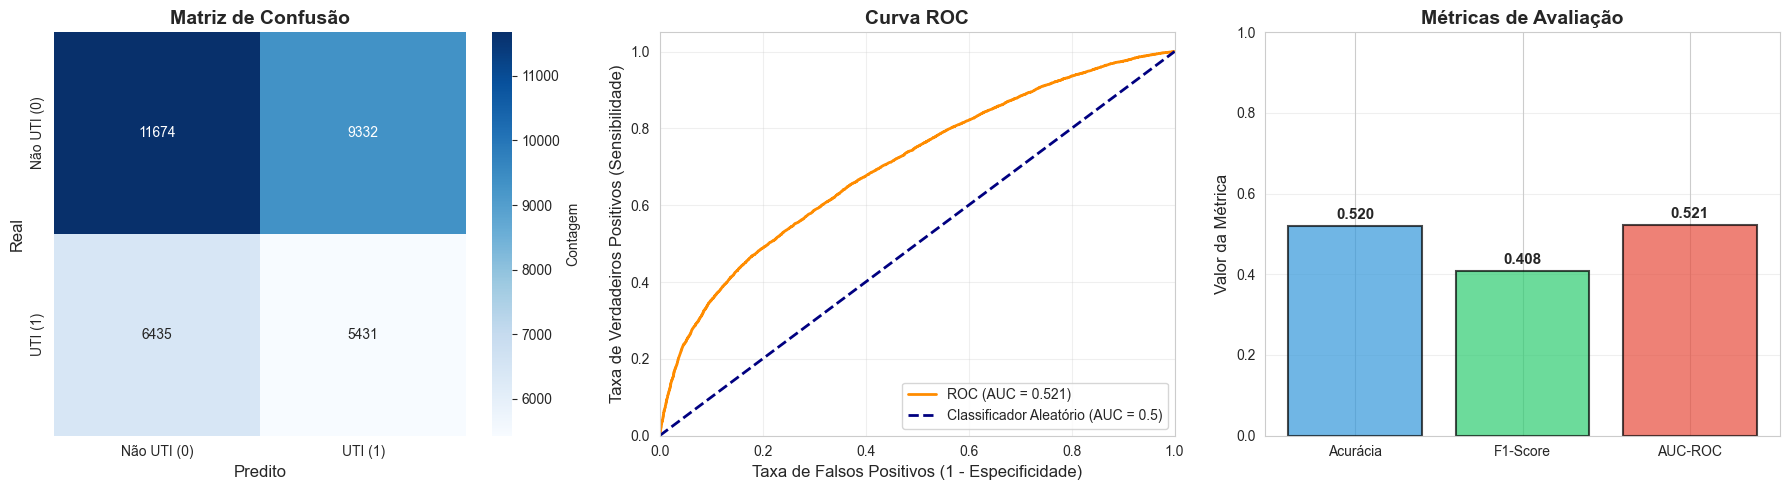


 Visualizações geradas com sucesso!


In [225]:
# VISUALIZAÇÕES DAS MÉTRICAS
# Configuração de estilos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 5)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não UTI (0)', 'UTI (1)'],
            yticklabels=['Não UTI (0)', 'UTI (1)'],
            ax=ax1, cbar_kws={'label': 'Contagem'})
ax1.set_title('Matriz de Confusão', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predito', fontsize=12)
ax1.set_ylabel('Real', fontsize=12)

from sklearn.metrics import roc_curve

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

ax2 = axes[1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC (AUC = {auc_roc:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Classificador Aleatório (AUC = 0.5)')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Taxa de Falsos Positivos (1 - Especificidade)', fontsize=12)
ax2.set_ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)', fontsize=12)
ax2.set_title('Curva ROC', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right", fontsize=10)
ax2.grid(True, alpha=0.3)

ax3 = axes[2]
metricas = ['Acurácia', 'F1-Score', 'AUC-ROC']
valores = [acuracia, f1, auc_roc]
cores = ['
bars = ax3.bar(metricas, valores, color=cores, alpha=0.7, edgecolor='black', linewidth=1.5)
ax3.set_ylim([0, 1])
ax3.set_ylabel('Valor da Métrica', fontsize=12)
ax3.set_title('Métricas de Avaliação', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

for bar, valor in zip(bars, valores):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{valor:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()
print("\n Visualizações geradas com sucesso!")


## Análise dos Resultados e Interpretação

In [226]:
# ANÁLISE DOS RESULTADOS
print("=" * 70)
print("ANÁLISE DOS RESULTADOS DO MODELO")
print("=" * 70)
print()

print("1⃣ ANÁLISE DE PERFORMANCE DO MODELO")
print("-" * 70)
print(f"   • Acurácia: {acuracia:.2%}")
print(f"     → O modelo classifica corretamente {acuracia:.2%} dos casos.")
print(f"     → Considerando o desbalanceamento (distribuição da variável alvo),")
print(f"       uma acurácia de {acuracia:.2%} está próxima do baseline (63.9%),")
print(f"       indicando que o modelo tem dificuldade em superar a classe majoritária.")
print()
print(f"   • F1-Score: {f1:.3f}")
print(f"     → Balanceia precisão e recall, sendo útil para classes desbalanceadas.")
print(f"     → Um F1-Score de {f1:.3f} indica performance moderada.")
print()
print(f"   • AUC-ROC: {auc_roc:.3f}")
print(f"     → Mede a capacidade do modelo de distinguir entre as classes.")
print(f"     → AUC > 0.5 indica que o modelo é melhor que aleatório.")
print(f"     → Um valor de {auc_roc:.3f} sugere capacidade discriminativa moderada.")
print()

print("2⃣ ANÁLISE DO DESBALANCEAMENTO")
print("-" * 70)
distribuicao = df_modelo["internado_uti"].value_counts(normalize=True)
print(f"   • Distribuição da variável alvo:")
print(f"     - Não UTI (0): {distribuicao[0.0]:.2%}")
print(f"     - UTI (1): {distribuicao[1.0]:.2%}")
print(f"   • Razão de desbalanceamento: {distribuicao[0.0]/distribuicao[1.0]:.2f}:1")
print(f"   • Há um desbalanceamento moderado (aproximadamente 1.77:1).")
print(f"   • O uso de 'class_weight=balanced' ajuda a compensar esse desbalanceamento.")
print()

print("3⃣ INTERPRETAÇÃO DA MATRIZ DE CONFUSÃO")
print("-" * 70)
tn, fp, fn, tp = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
sensibilidade = tp / (tp + fn) if (tp + fn) > 0 else 0
especificidade = tn / (tn + fp) if (tn + fp) > 0 else 0
precisao = tp / (tp + fp) if (tp + fp) > 0 else 0
print(f"   • Sensibilidade (Recall - Classe UTI): {sensibilidade:.2%}")
print(f"     → Dos casos realmente internados em UTI, {sensibilidade:.2%} foram identificados corretamente.")
print()
print(f"   • Especificidade (Classe Não UTI): {especificidade:.2%}")
print(f"     → Dos casos realmente não internados em UTI, {especificidade:.2%} foram identificados corretamente.")
print()
print(f"   • Precisão (Classe UTI): {precisao:.2%}")
print(f"     → Dos casos previstos como internados em UTI, {precisao:.2%} são realmente internados em UTI.")
print()
print(f"   • Observação:")
print(f"     O modelo tem mais dificuldade em identificar corretamente")
print(f"     a classe minoritária (internado em UTI), o que é comum em dados desbalanceados.")
print()

print("4⃣ IMPORTÂNCIA DAS VARIÁVEIS")
print("-" * 70)
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': log_reg.coef_[0]
})
coeficientes['Abs_Coeficiente'] = np.abs(coeficientes['Coeficiente'])
coeficientes = coeficientes.sort_values('Abs_Coeficiente', ascending=False)
print("   Coeficientes da Regressão Logística (ordenados por importância):")
print()
for idx, row in coeficientes.iterrows():
    sinal = "+" if row['Coeficiente'] > 0 else "-"
    print(f"   {sinal} {row['Variável']:20s}: {row['Coeficiente']:7.4f}")
print()
print("   Interpretação:")
print("   • Coeficientes positivos aumentam a probabilidade de ser internado em UTI.")
print("   • Coeficientes negativos diminuem a probabilidade de ser internado em UTI.")
print("   • Valores absolutos maiores indicam maior influência na predição.")
print()

print("5⃣ AJUSTES SUGERIDOS PARA MELHORAR O MODELO")
print("-" * 70)
print("   • Testar outros algoritmos:")
print("     - Árvores de Decisão (melhor interpretabilidade)")
print("     - Random Forest (pode capturar interações não-lineares)")
print("     - kNN (pode ser útil para padrões locais)")
print()
print("   • Engenharia de features:")
print("     - Criar interações entre variáveis (ex: sexo × região)")
print("     - Adicionar variáveis temporais (sazonalidade)")
print("     - Considerar variáveis geográficas adicionais")
print()
print("   • Tratamento de desbalanceamento:")
print("     - Testar SMOTE (oversampling da classe minoritária)")
print("     - Ajustar threshold de classificação")
print("     - Usar métricas específicas (F1, AUC-ROC) como critério de otimização")
print()
print("   • Validação cruzada:")
print("     - Implementar k-fold cross-validation para avaliação mais robusta")
print("     - Tuning de hiperparâmetros (GridSearchCV)")
print()
print("=" * 70)


ANÁLISE DOS RESULTADOS DO MODELO

1️⃣ ANÁLISE DE PERFORMANCE DO MODELO
----------------------------------------------------------------------
   • Acurácia: 52.04%
     → O modelo classifica corretamente 52.04% dos casos.
     → Considerando o desbalanceamento (distribuição da variável alvo),
       uma acurácia de 52.04% está próxima do baseline (63.9%),
       indicando que o modelo tem dificuldade em superar a classe majoritária.

   • F1-Score: 0.408
     → Balanceia precisão e recall, sendo útil para classes desbalanceadas.
     → Um F1-Score de 0.408 indica performance moderada.

   • AUC-ROC: 0.521
     → Mede a capacidade do modelo de distinguir entre as classes.
     → AUC > 0.5 indica que o modelo é melhor que aleatório.
     → Um valor de 0.521 sugere capacidade discriminativa moderada.

2️⃣ ANÁLISE DO DESBALANCEAMENTO
----------------------------------------------------------------------
   • Distribuição da variável alvo:
     - Não UTI (0): 64.63%
     - UTI (1): 35.37%
 

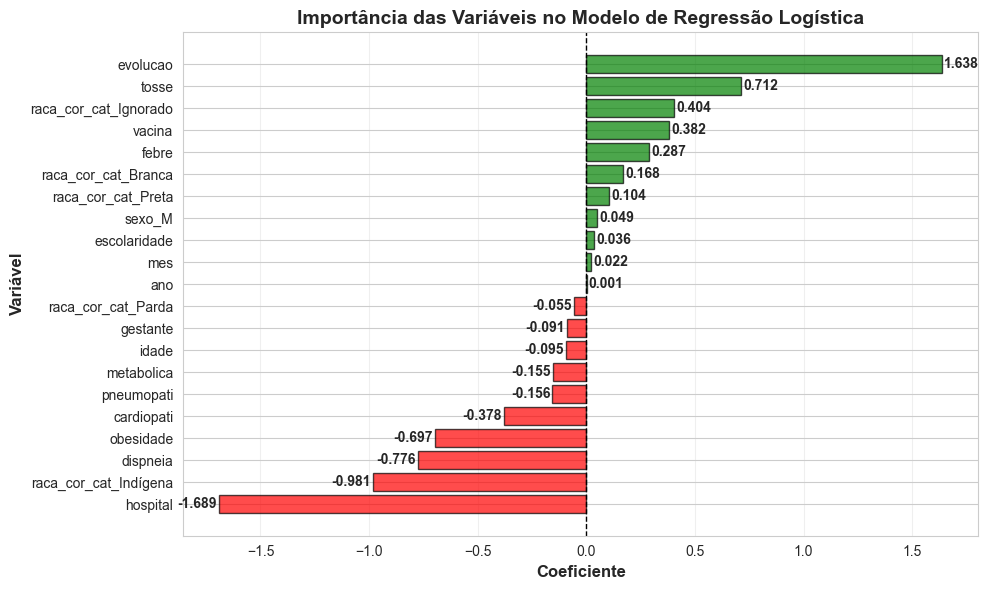

 Gráfico de importância das variáveis gerado!


In [227]:
plt.figure(figsize=(10, 6))
coeficientes_ordenados = coeficientes.sort_values('Coeficiente', ascending=True)
cores = ['red' if x < 0 else 'green' for x in coeficientes_ordenados['Coeficiente']]
bars = plt.barh(coeficientes_ordenados['Variável'],
                 coeficientes_ordenados['Coeficiente'],
                 color=cores, alpha=0.7, edgecolor='black', linewidth=1)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Coeficiente', fontsize=12, fontweight='bold')
plt.ylabel('Variável', fontsize=12, fontweight='bold')
plt.title('Importância das Variáveis no Modelo de Regressão Logística',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

for bar, valor in zip(bars, coeficientes_ordenados['Coeficiente']):
    width = bar.get_width()
    plt.text(width + (0.01 if width > 0 else -0.01), bar.get_y() + bar.get_height()/2,
             f'{valor:.3f}', ha='left' if width > 0 else 'right',
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
print(" Gráfico de importância das variáveis gerado!")
